# Minibatch K-means

- Works on big data
- Allows online learning

In [1]:
from sklearn import cluster, datasets, metrics, mixture, pipeline, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = datasets.make_blobs(n_samples=500_000, center_box=(-100, 100))

In [3]:
%%time
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)

Wall time: 1.64 s


KMeans(n_clusters=3)

In [4]:
%%time
mb_kmeans = cluster.MiniBatchKMeans(n_clusters=3, batch_size=4800)
mb_kmeans.fit(X)

Wall time: 326 ms


MiniBatchKMeans(batch_size=4800, n_clusters=3)

Check WCSS to make sure both clustering schemes are similar:

In [5]:
kmeans.score(X)

-998813.2613074393

In [6]:
mb_kmeans.score(X)

-998835.2490270414

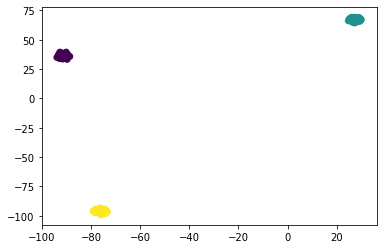

In [7]:
plt.scatter(*X[::1000].T, c=kmeans.predict(X[::1000]))

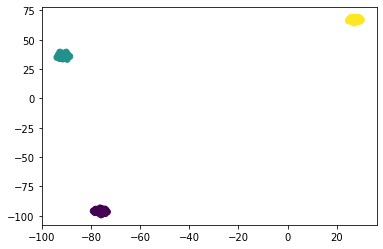

In [8]:
plt.scatter(*X[::1000].T, c=mb_kmeans.predict(X[::1000]))

In [9]:
metrics.silhouette_score(X[::100], kmeans.predict(X[::100]))

0.9858225640984191

In [10]:
metrics.silhouette_score(X[::100], mb_kmeans.predict(X[::100]))

0.9858225640984191

## Partial fit for online learning

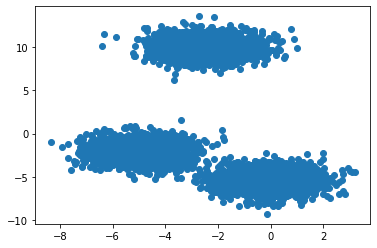

In [11]:
X, y = datasets.make_blobs(n_samples=5000, random_state=50)
plt.scatter(*X.T)

In [12]:
mbk = cluster.MiniBatchKMeans(n_clusters=3, n_init=1, random_state=2, reassignment_ratio=0.5)
batch_size=3
mbk.fit(X[:batch_size])
centers = []
for i in range(1, 5000//batch_size):
    mbk.partial_fit(X[i*batch_size:(i+1)*batch_size])
    centers.append(mbk.cluster_centers_.copy())

In [13]:
movements = ((np.diff(np.array(centers), axis=0)**2).sum(axis=2)**0.5)

In [14]:
@interact(iters=(1,5000//batch_size-2,1))
def mbkviz(iters=0):
    plt.figure(figsize=(12, 8))
    plt.scatter(*X[:(iters - 1)*batch_size].T, s=20, alpha=0.4, label="Eski ornekler")
    plt.scatter(*X[(iters - 1)*batch_size:iters*batch_size].T, s=20, label="Son ornekler")
    plt.scatter(*centers[iters].T, c=['r', 'g', 'b'], s=200, marker='*', edgecolors='k', label="Kume merkezleri")
    plt.plot(*np.array(centers)[:iters, 0, :].T, 'r')
    plt.plot(*np.array(centers)[:iters, 1, :].T, 'g')
    plt.plot(*np.array(centers)[:iters, 2, :].T, 'b')
    plt.xlim(-10, 5)
    plt.ylim(-12, 15)
    plt.legend()

interactive(children=(IntSlider(value=1, description='iters', max=1664, min=1), Output()), _dom_classes=('widg…

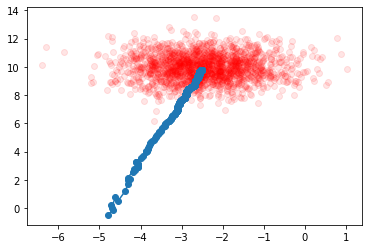

In [15]:
plt.scatter(*X[mbk.predict(X)==1].T, color='red', alpha=0.1)
plt.plot(*np.array(centers)[:,1,:].T, marker='o')

[]

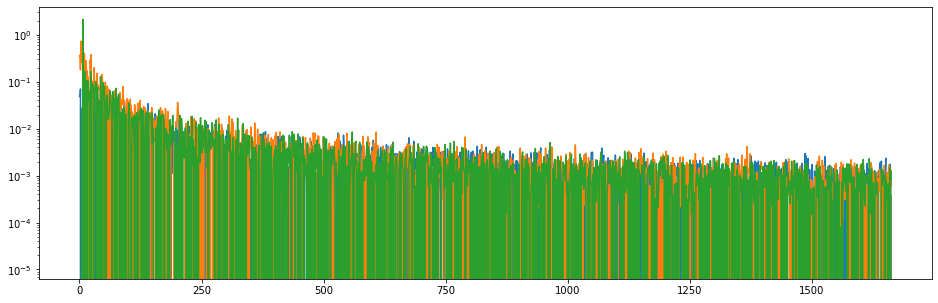

In [16]:
plt.figure(figsize=(16, 5))
plt.plot(movements)
plt.semilogy()